In [1]:
import numpy as np
import pandas as pd
import gzip
import os
from tqdm import tqdm


In [52]:
train = pd.read_csv('/content/drive/MyDrive/u1.base', sep='\t', header=None)

In [53]:
test = pd.read_csv('/content/drive/MyDrive/u1.test', sep='\t', header=None)

In [54]:
def clean(df):
    df.columns=['uid', 'iid', 'score', 'something else']
    df.drop(['something else'], inplace=True, axis=1)
    df['score'] = df['score'].astype('float32')
    df['uid'] = df['uid'].astype('int32')
    df['iid'] = df['iid'].astype('int32')
    return df

In [55]:
train = clean(train)
test = clean(test)

In [63]:
train['uid'] = train['uid'].astype('int32')
train['iid'] = train['iid'].astype('int32')
test['uid'] = test['uid'].astype('int32')
test['iid'] = test['iid'].astype('int32')

In [56]:
U = max(max(train['uid']), max(test['uid']))
I = max(max(train['iid']), max(test['iid']))

define SGD: random choose one sample from dataset to update Ai and Bj
test every 500 steps;

In [28]:
import matplotlib.pyplot as plt

In [99]:
def SGD(steps, lr, U, I, k, train_df, test_df):
    A = np.random.rand(U, k)
    B = np.random.rand(I, k)
    error_rate = []
    # for _ in tqdm(range(steps)):
    for _ in range(steps):
        # pick one sample randomly
        sample = train_df.iloc[np.random.randint(0, len(train_df))]
        i = int(sample['uid'])
        j = int(sample['iid'])
        # update ai
        subset = train_df[train_df['uid'] == i]
        ai = A[i]
        for ii in range(len(subset)):
            row = subset.iloc[ii]
            A[i] += lr * (row['score'] * B[int(row['iid'])] - ai * np.dot(B[int(row['iid'])], B[int(row['iid'])]))    
        
        # update bj
        subset = train_df[train_df['iid'] == j]
        bj = B[j]
        for ii in range(len(subset)):
            row = subset.iloc[ii]
            B[j] += lr * (row['score'] * A[int(row['uid'])] - bj * np.dot(A[int(row['uid'])], A[int(row['uid'])]))

        if _ % 10 == 0:
            error = 0
            for ii in range(len(test)):
                row = test.iloc[ii]
                i = int(row['uid'])
                j = int(row['iid'])
                pred = np.dot(A[i], B[j])
                error += (pred - row['score']) * (pred - row['score'])
            error /= len(test)
            error_rate.append(error)
    x_axis = list(range(len(error_rate)))
    x_axis = [x * 10 for x in x_axis]
    plt.plot(x_axis, error_rate)
    plt.show()

    return error_rate




  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:03<1:01:25,  3.69s/it]

  0%|          | 3/1000 [00:03<43:18,  2.61s/it]  

  0%|          | 5/1000 [00:04<30:47,  1.86s/it]

  1%|          | 7/1000 [00:04<21:54,  1.32s/it]

  1%|          | 9/1000 [00:04<15:36,  1.06it/s]

  1%|          | 11/1000 [00:08<21:00,  1.27s/it]

  1%|▏         | 14/1000 [00:08<14:54,  1.10it/s]

  2%|▏         | 17/1000 [00:08<10:37,  1.54it/s]

  2%|▏         | 20/1000 [00:08<07:37,  2.14it/s]

  2%|▏         | 22/1000 [00:12<14:09,  1.15it/s]

  2%|▏         | 24/1000 [00:12<10:22,  1.57it/s]

  3%|▎         | 26/1000 [00:12<07:38,  2.13it/s]

  3%|▎         | 28/1000 [00:12<05:35,  2.90it/s]

  3%|▎         | 30/1000 [00:13<04:25,  3.65it/s]

  3%|▎         | 32/1000 [00:17<13:24,  1.20it/s]

  4%|▎         | 35/1000 [00:17<09:37,  1.67it/s]

  4%|▍         | 38/1000 [00:17<07:02,  2.28it/s]

  4%|▍         | 40/1000 [00:17<05:24,  2.96it/s]

  4%|▍         | 42/1000 [00:21<13:02, 

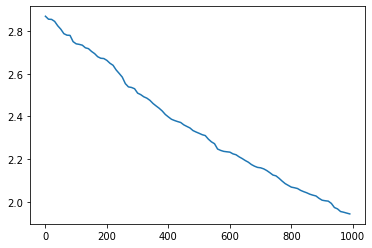

In [97]:
error_rate = SGD(1000, 0.001, U+1, I+1, 10, train, test)

k = 5,  lr = 0.001


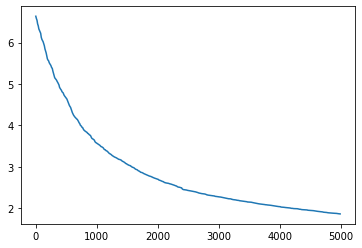

k = 5,  lr = 0.005


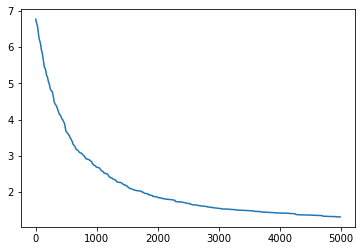

k = 8,  lr = 0.001


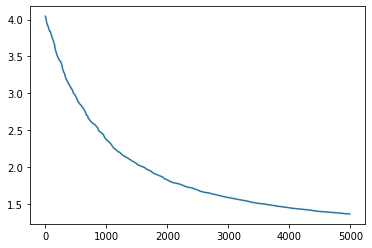

k = 8,  lr = 0.005


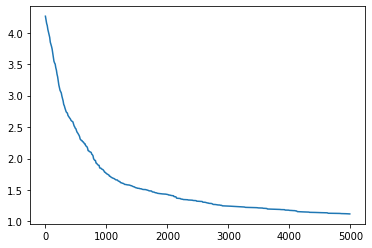

k = 10,  lr = 0.001


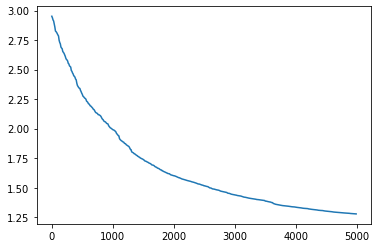

k = 10,  lr = 0.005


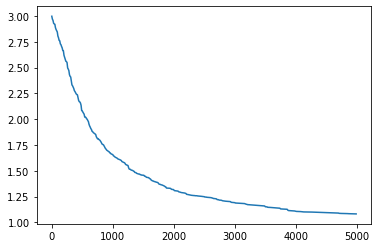

k = 15,  lr = 0.001


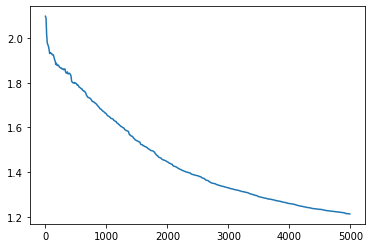

k = 15,  lr = 0.005


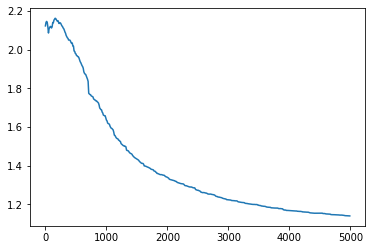

In [101]:
K = [5, 8, 10, 15]
LR = [0.001, 0.005]
for k in K:
    for lr in LR:
        print(f'k = {k},  lr = {lr}')
        error_rate = SGD(5000, lr, U+1, I+1, k, train, test) 